<a href="https://colab.research.google.com/github/Daeyoung428/Learning_Python/blob/Master/24_06_08_%ED%85%8C%EB%A7%88%EC%A3%BC_%EC%88%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-output.ipynb)


## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [ ]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm.fontManager.addfont(fontpath)

        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
font_family = get_font_family()

In [ ]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<ipython-input-9-346d272d8f16>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-9-346d272d8f16>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글'}>

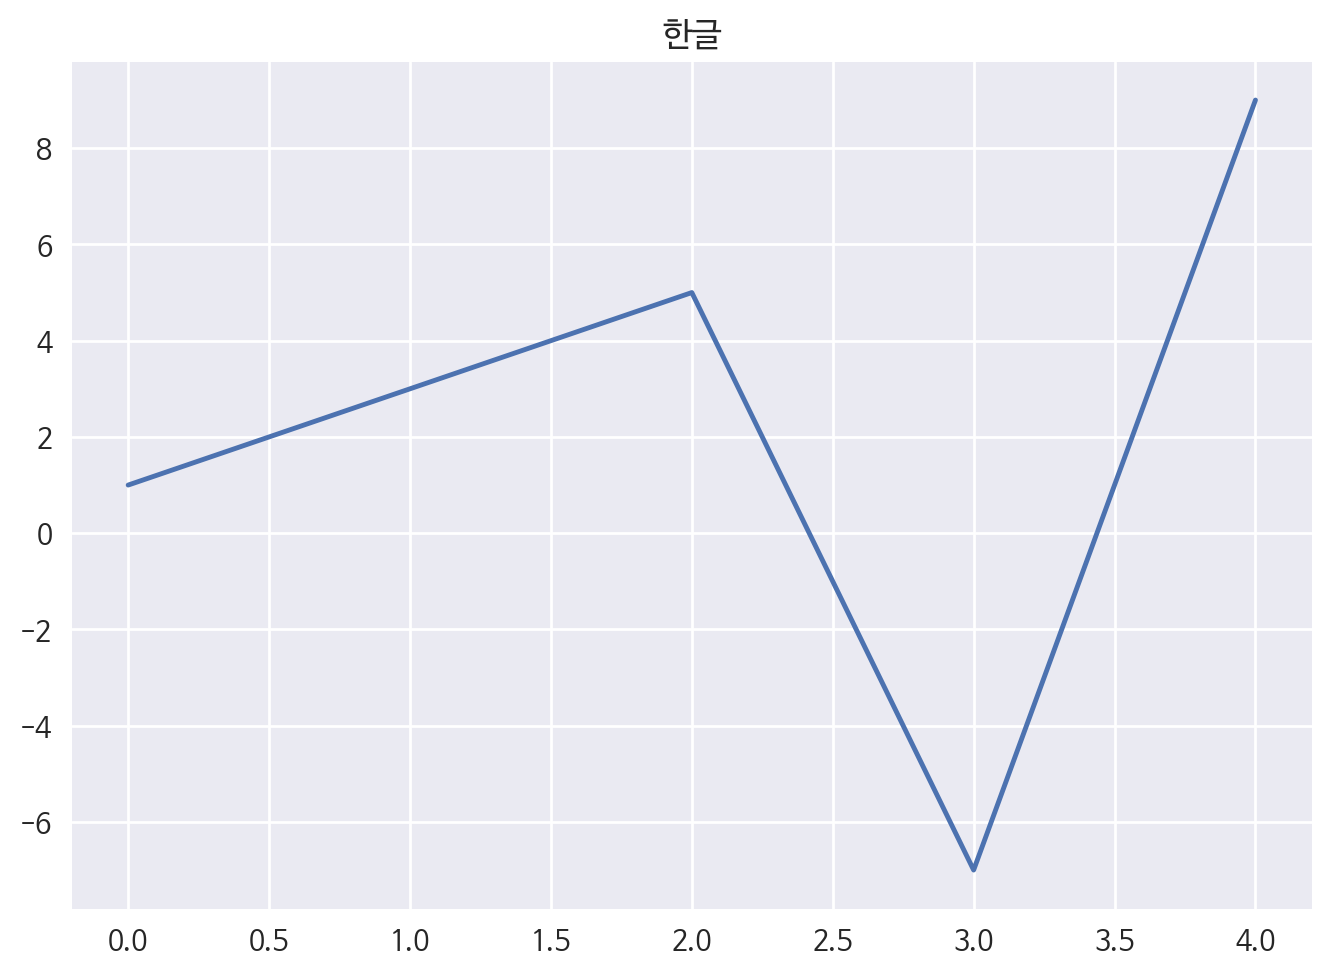

In [ ]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

### 제약업종 수집하기
* 제약업종 주소가 변경되었습니다. https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [ ]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"

In [ ]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [ ]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
raw = raw.dropna(how="all").dropna(axis=1, how="all")
raw.shape
# 3개의 row, 3개의 column이 제거되었습니다.

(133, 12)


(130, 10)

In [ ]:
raw

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,에코프로머티,테마 편입 사유,124100.0,"상한가 28,600",+29.95%,124100.0,0.0,6109363.0,684649.0,3902376.0
2,신성에스티 *,테마 편입 사유,40100.0,"상승 7,350",+22.44%,40100.0,40150.0,3095557.0,120458.0,160290.0
3,에코앤드림 *,테마 편입 사유,51000.0,"상승 8,250",+19.30%,50900.0,51000.0,2225595.0,106643.0,1732252.0
4,광무 *,테마 편입 사유,5750.0,상승 765,+15.35%,5740.0,5750.0,7169283.0,40735.0,1836165.0
5,코이즈 *,테마 편입 사유,1250.0,상승 154,+14.05%,1249.0,1250.0,18887876.0,25989.0,437664.0
...,...,...,...,...,...,...,...,...,...,...
126,대한유화,테마 편입 사유,146700.0,"하락 3,400",-2.27%,146600.0,146700.0,14026.0,2069.0,17991.0
127,한빛레이저 *,테마 편입 사유,5950.0,하락 140,-2.30%,5950.0,5990.0,577994.0,3518.0,937155.0
128,유에스티 *,테마 편입 사유,3030.0,하락 120,-3.81%,2995.0,3030.0,262247.0,801.0,1098657.0
129,엔켐 *,테마 편입 사유,279500.0,"하락 15,000",-5.09%,279500.0,280000.0,350269.0,99609.0,284237.0


## 파생변수 만들기

In [ ]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2024-06-08'

In [ ]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [ ]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,에코프로머티,테마 편입 사유,124100.0,"상한가 28,600",+29.95%,124100.0,0.0,6109363.0,684649.0,3902376.0,2024-06-08
2,신성에스티 *,테마 편입 사유,40100.0,"상승 7,350",+22.44%,40100.0,40150.0,3095557.0,120458.0,160290.0,2024-06-08
3,에코앤드림 *,테마 편입 사유,51000.0,"상승 8,250",+19.30%,50900.0,51000.0,2225595.0,106643.0,1732252.0,2024-06-08
4,광무 *,테마 편입 사유,5750.0,상승 765,+15.35%,5740.0,5750.0,7169283.0,40735.0,1836165.0,2024-06-08
5,코이즈 *,테마 편입 사유,1250.0,상승 154,+14.05%,1249.0,1250.0,18887876.0,25989.0,437664.0,2024-06-08


## 거래량과 거래대금 시각화

<Axes: ylabel='종목명'>

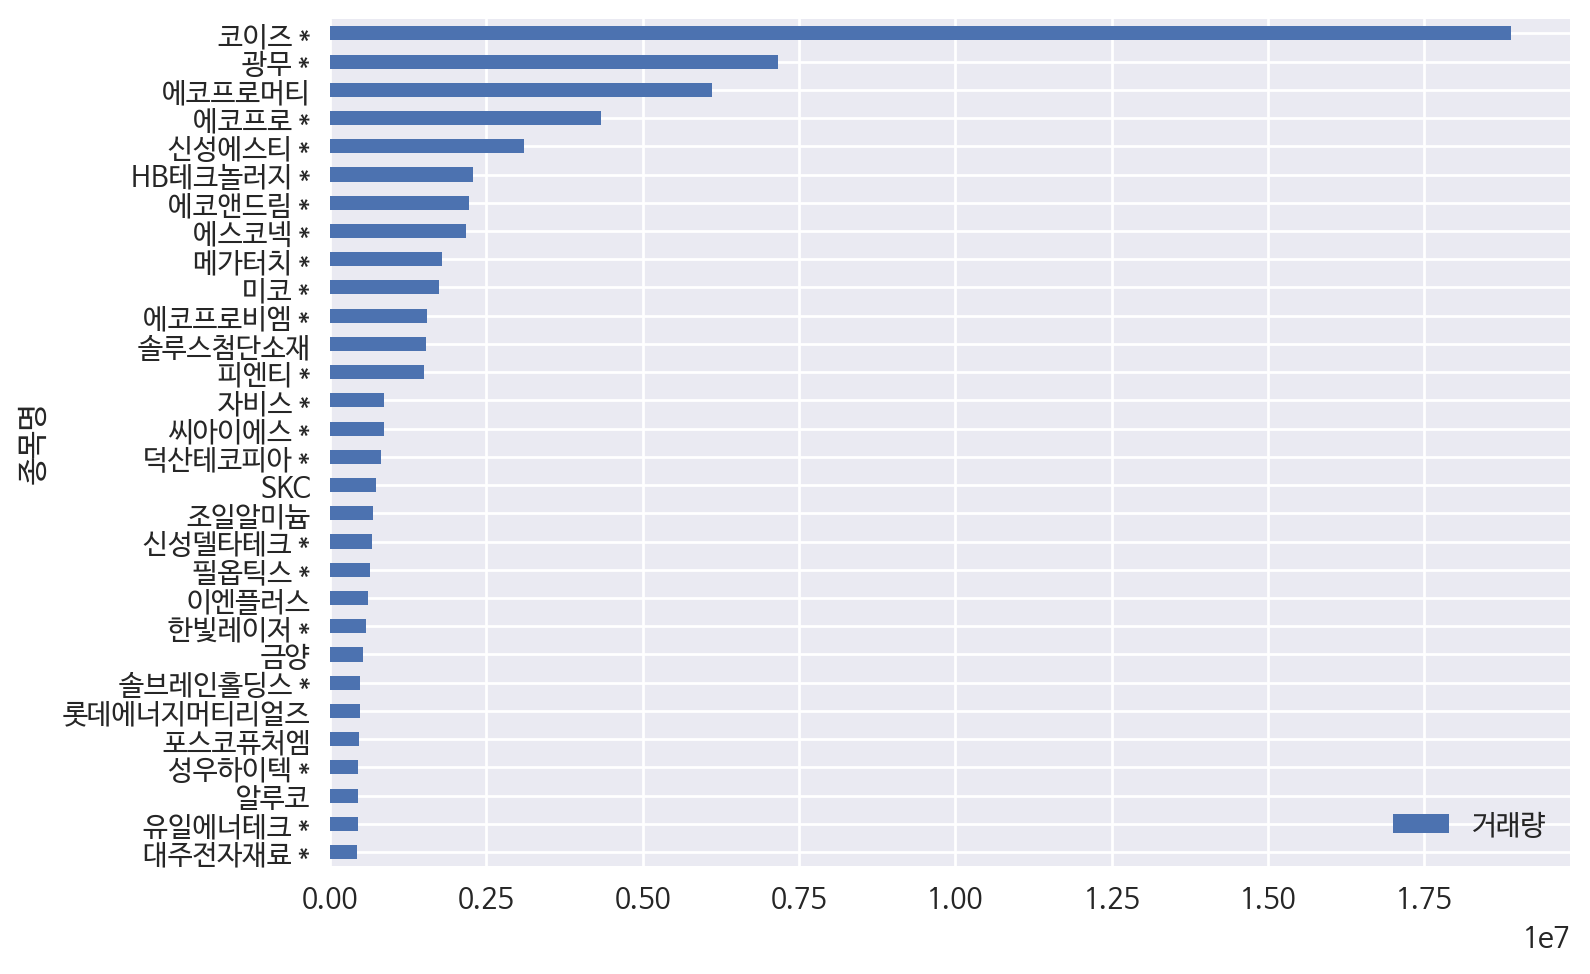

In [ ]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

<Axes: ylabel='종목명'>

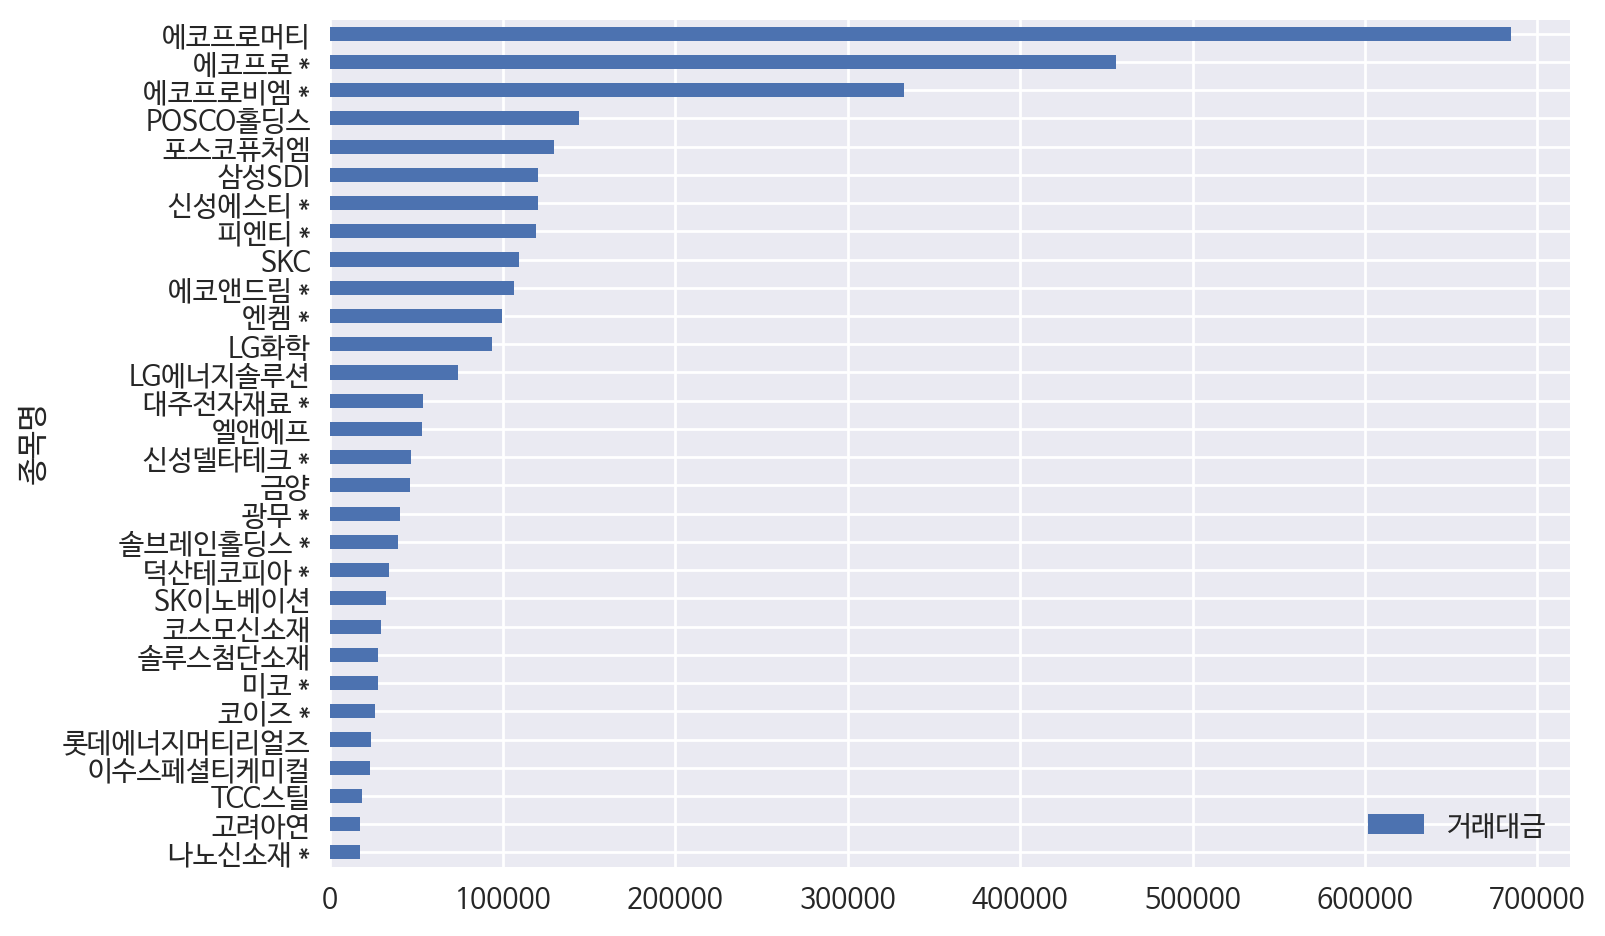

In [ ]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [ ]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

In [ ]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,에코프로머티,에코프로머티
2,신성에스티 *,신성에스티
3,에코앤드림 *,에코앤드림
4,광무 *,광무
5,코이즈 *,코이즈


In [ ]:
!pip install finance-datareader

In [ ]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,77300,2,-100,-0.13,78400,78600,77100,21189349,1645298001774,461464191115000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,207500,1,13800,7.12,199500,207500,197300,4805326,976785683968,151060490737500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,359000,1,7500,2.13,355000,360000,352500,208870,74451560000,84006000000000,234000000,STK
3,005380,KR7005380001,현대차,KOSPI,,265000,1,1000,0.38,262500,266500,261500,519878,137158711500,55495290615000,209416191,STK
4,207940,KR7207940008,삼성바이오로직스,KOSPI,,750000,2,-10000,-1.32,762000,769000,747000,57654,43394507000,53380500000000,71174000,STK


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [ ]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[["Code", "Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,005380,현대차
4,207940,삼성바이오로직스


In [ ]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(130, 12)

In [ ]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df
df = raw.merge(df_item_code_name, on="종목명_전처리", how='left')
df.shape

(130, 13)

In [ ]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,에코프로머티,테마 편입 사유,124100.0,"상한가 28,600",+29.95%,124100.0,0.0,6109363.0,684649.0,3902376.0,2024-06-08,에코프로머티,450080
1,신성에스티 *,테마 편입 사유,40100.0,"상승 7,350",+22.44%,40100.0,40150.0,3095557.0,120458.0,160290.0,2024-06-08,신성에스티,416180
2,에코앤드림 *,테마 편입 사유,51000.0,"상승 8,250",+19.30%,50900.0,51000.0,2225595.0,106643.0,1732252.0,2024-06-08,에코앤드림,101360
3,광무 *,테마 편입 사유,5750.0,상승 765,+15.35%,5740.0,5750.0,7169283.0,40735.0,1836165.0,2024-06-08,광무,029480
4,코이즈 *,테마 편입 사유,1250.0,상승 154,+14.05%,1249.0,1250.0,18887876.0,25989.0,437664.0,2024-06-08,코이즈,121850


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [ ]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [ ]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=068270'

In [ ]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [ ]:
tables[3]

주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2021.12   2022.12   2023.12 2024.12(E)   2023.03   2023.06   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  18934.00  22840.00  21764.00   35485.00   5976.00   5240.00   
1        영업이익   7442.00   6472.00   6515.00    6670.00   1824.00   1830.00   
2       당기순이익   5958.00   5426.00   5397.00    5562.00   1671.00   1509.00   
3       영업이익률     39.30     28.34     29.93      18.80     30.53     34.92   
4        순이익률     31.47     23.76     24.80      15.68     27.97     28.79   
5   ROE(지배주주)     16.04     13.35      5.07       3.23     14.81     13.45   
6        부채비율     40.09     37.84     16.30        NaN     43.19     43.14   
7        당좌비율    206.23    176.54     73.59        NaN    167.55    169.84   
8         유보율   2833.54   3093.79   8513.18        NaN   3051.86   3156.16   
9      EPS(원)   3966.00   3677.00   3639.00    2555.00   1129.00   1008.00   
10     PER(배)     48.09     43.65     55.37      74.79     37.49     40.78   
11     BPS(원)  27041.00  28885.00  80375.00   84304.00  29094.00  29918.00   
12     PBR(배)      7.05      5.56      2.51       2.27      5.15      5.11   
13   주당배당금(원)    708.00    361.00    500.00     558.00       NaN       NaN   
14   시가배당률(%)      0.37      0.22      0.25        NaN       NaN       NaN   
15    배당성향(%)     17.68      9.61     19.34        NaN       NaN       NaN   

                                             
     2023.09   2023.12   2024.03 2024.06(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0    6723.00   3826.00   7370.00    7807.00  
1    2676.00    184.00    154.00     693.00  
2    2212.00      5.00    208.00     552.00  
3      39.81      4.81      2.10       8.88  
4      32.91      0.12      2.82       7.07  
5      14.31      5.07      3.74        NaN  
6      46.32     16.30     18.49        NaN  
7     156.11     73.59     74.99        NaN  
8    3302.58   8513.18   8314.82        NaN  
9    1515.00      7.00    103.00     390.00  
10     33.74     55.37     80.33     490.62  
11  30691.00  80375.00  81537.00        NaN  
12      4.54      2.51      2.34        NaN  
13       NaN    500.00       NaN        NaN  
14       NaN      0.25       NaN        NaN  
15       NaN   9830.47       NaN        NaN

In [ ]:
# 제대로 수집이 되었는지 확인합니다.
tables[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2024.06(E)
,주요재무정보,IFRS연결
0,매출액,7807.00
1,영업이익,693.00
2,당기순이익,552.00
3,영업이익률,8.88
4,순이익률,7.07
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [ ]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2024.03),추정PERlEPS,PBRlBPS (2024.03),배당수익률l2023.12,동일업종 PER,동일업종 등락률
1,216993223,51482818,23.73%,"4.00매수 l 242,143","241,000 l 131,000","80.29배 l 2,380원","75.00배 l 2,555원","2.34배 l 81,537원",0.26%,100.06배,+0.35%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [ ]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [ ]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [ ]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [ ]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0        1
 0         매출액  7807.00
 1        영업이익   693.00
 2       당기순이익   552.00
 3       영업이익률     8.88
 4        순이익률     7.07
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   390.00
 10     PER(배)   490.62
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
           0               1
 0      시가총액  41조  4,674  억원
 1    시가총액순위          코스피 8위
 2     상장주식수       216993223
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  216993223
 1  외국인보유주식수(B)   51482818
 2  외국인소진율(B/A)     23.73%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  242,143
 1   52주최고l최저  241,000  l  131,000,
                    0                  1
 0   PERlEPS(2024.03)  80.29배  l  2,380원
 1          추정PERlEPS  75.00배  l  2,555원
 2  PBRlBPS (2024.03)  2.34배  l  81,537원
 3      배당수익률l2023.12              0.26%,
           0        1
 0

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [ ]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),216993223
1,외국인보유주식수(B),51482818
2,외국인소진율(B/A),23.73%


In [ ]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,7807.0
1,영업이익,693.0
2,당기순이익,552.0
3,영업이익률,8.88
4,순이익률,7.07
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),390.0


## transpose를 통해 행과 열의 위치를 변경

In [ ]:
df_item.set_index(0)

,1
0,
매출액,7807.0
영업이익,693.0
당기순이익,552.0
영업이익률,8.88
순이익률,7.07
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [ ]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2024.03),추정PERlEPS,PBRlBPS (2024.03),배당수익률l2023.12,동일업종 PER,동일업종 등락률
1,7807.0,693.0,552.0,8.88,7.07,NaN,NaN,NaN,NaN,390.0,...,51482818,23.73%,"4.00매수 l 242,143","241,000 l 131,000","80.29배 l 2,380원","75.00배 l 2,555원","2.34배 l 81,537원",0.26%,100.06배,+0.35%


## 개별 주가 정보를 수집하는 함수를 생성

In [ ]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다.
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):

    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")

    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)

    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)

    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [ ]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2024.03),추정PERlEPS,PBRlBPS (2024.03),배당수익률l2023.12,동일업종 PER,동일업종 등락률
1,7807.0,693.0,552.0,8.88,7.07,NaN,NaN,NaN,NaN,390.0,...,51482818,23.73%,"4.00매수 l 242,143","241,000 l 131,000","80.29배 l 2,380원","75.00배 l 2,555원","2.34배 l 81,537원",0.26%,100.06배,+0.35%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [ ]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/130 [00:00<?, ?it/s]

In [ ]:
result

0      0     매출액  영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주) 부채...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
125    0     매출액 영업이익  당기순이익 영업이익률  순이익률 ROE(지배주주) 부채...
126    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
127    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
128    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
129    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 130, dtype: object

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [ ]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

In [ ]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,배당수익률,동일업종 PER,동일업종 등락률,PERlEPS(2023.12),PBRlBPS (2023.12),배당수익률l2023.12,배당수익률l2024.03,배당수익률l2024.02,배당수익률l2024.04,종목코드
0,1027.0,-10.0,7.0,-0.97,0.68,NaN,NaN,NaN,NaN,10.0,...,NaN,78.32배,+4.08%,NaN,NaN,NaN,NaN,NaN,NaN,450080
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,78.32배,+4.08%,"32.79배 l 1,223원","3.69배 l 10,874원",0.50%,NaN,NaN,NaN,416180
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54.17배,+2.14%,NaN,NaN,NaN,NaN,NaN,NaN,101360
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-52.46배,+2.48%,NaN,NaN,NaN,NaN,NaN,NaN,029480
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.47배,+1.15%,NaN,NaN,NaN,NaN,NaN,NaN,121850


In [ ]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(130, 13)

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [ ]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,에코프로머티,테마 편입 사유,124100.0,"상한가 28,600",+29.95%,124100.0,0.0,6109363.0,684649.0,3902376.0,2024-06-08,에코프로머티,450080
1,신성에스티 *,테마 편입 사유,40100.0,"상승 7,350",+22.44%,40100.0,40150.0,3095557.0,120458.0,160290.0,2024-06-08,신성에스티,416180
2,에코앤드림 *,테마 편입 사유,51000.0,"상승 8,250",+19.30%,50900.0,51000.0,2225595.0,106643.0,1732252.0,2024-06-08,에코앤드림,101360
3,광무 *,테마 편입 사유,5750.0,상승 765,+15.35%,5740.0,5750.0,7169283.0,40735.0,1836165.0,2024-06-08,광무,029480
4,코이즈 *,테마 편입 사유,1250.0,상승 154,+14.05%,1249.0,1250.0,18887876.0,25989.0,437664.0,2024-06-08,코이즈,121850


In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((130, 13), (130, 38), (130, 50))

In [ ]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,PBRlBPS (2024.03),배당수익률,동일업종 PER,동일업종 등락률,PERlEPS(2023.12),PBRlBPS (2023.12),배당수익률l2023.12,배당수익률l2024.03,배당수익률l2024.02,배당수익률l2024.04
0,에코프로머티,테마 편입 사유,124100.0,"상한가 28,600",+29.95%,124100.0,0.0,6109363.0,684649.0,3902376.0,...,"10.98배 l 11,299원",NaN,78.32배,+4.08%,NaN,NaN,NaN,NaN,NaN,NaN
1,신성에스티 *,테마 편입 사유,40100.0,"상승 7,350",+22.44%,40100.0,40150.0,3095557.0,120458.0,160290.0,...,NaN,NaN,78.32배,+4.08%,"32.79배 l 1,223원","3.69배 l 10,874원",0.50%,NaN,NaN,NaN
2,에코앤드림 *,테마 편입 사유,51000.0,"상승 8,250",+19.30%,50900.0,51000.0,2225595.0,106643.0,1732252.0,...,"5.72배 l 8,918원",NaN,54.17배,+2.14%,NaN,NaN,NaN,NaN,NaN,NaN
3,광무 *,테마 편입 사유,5750.0,상승 765,+15.35%,5740.0,5750.0,7169283.0,40735.0,1836165.0,...,"1.33배 l 4,313원",NaN,-52.46배,+2.48%,NaN,NaN,NaN,NaN,NaN,NaN
4,코이즈 *,테마 편입 사유,1250.0,상승 154,+14.05%,1249.0,1250.0,18887876.0,25989.0,437664.0,...,2.59배 l 483원,NaN,49.47배,+1.15%,NaN,NaN,NaN,NaN,NaN,NaN


## 파일명 만들기

In [ ]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name

file_name_1 = url.split("=")[1].replace("&", "_")
file_name_2 = url.split("=")[2]
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'theme_no_64_2024-06-08.csv'

In [ ]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [ ]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,PBRlBPS (2024.03),배당수익률,동일업종 PER,동일업종 등락률,PERlEPS(2023.12),PBRlBPS (2023.12),배당수익률l2023.12,배당수익률l2024.03,배당수익률l2024.02,배당수익률l2024.04
0,에코프로머티,테마 편입 사유,124100.0,"상한가 28,600",+29.95%,124100.0,0.0,6109363.0,684649.0,3902376.0,...,"10.98배 l 11,299원",NaN,78.32배,+4.08%,NaN,NaN,NaN,NaN,NaN,NaN
1,신성에스티 *,테마 편입 사유,40100.0,"상승 7,350",+22.44%,40100.0,40150.0,3095557.0,120458.0,160290.0,...,NaN,NaN,78.32배,+4.08%,"32.79배 l 1,223원","3.69배 l 10,874원",0.50%,NaN,NaN,NaN
2,에코앤드림 *,테마 편입 사유,51000.0,"상승 8,250",+19.30%,50900.0,51000.0,2225595.0,106643.0,1732252.0,...,"5.72배 l 8,918원",NaN,54.17배,+2.14%,NaN,NaN,NaN,NaN,NaN,NaN
3,광무 *,테마 편입 사유,5750.0,상승 765,+15.35%,5740.0,5750.0,7169283.0,40735.0,1836165.0,...,"1.33배 l 4,313원",NaN,-52.46배,+2.48%,NaN,NaN,NaN,NaN,NaN,NaN
4,코이즈 *,테마 편입 사유,1250.0,상승 154,+14.05%,1249.0,1250.0,18887876.0,25989.0,437664.0,...,2.59배 l 483원,NaN,49.47배,+1.15%,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,대한유화,테마 편입 사유,146700.0,"하락 3,400",-2.27%,146600.0,146700.0,14026.0,2069.0,17991.0,...,"0.50배 l 293,469원",NaN,54.17배,+2.14%,NaN,NaN,0.68%,NaN,NaN,NaN
126,한빛레이저 *,테마 편입 사유,5950.0,하락 140,-2.30%,5950.0,5990.0,577994.0,3518.0,937155.0,...,NaN,NaN,78.32배,+4.08%,N/A l -261원,"4.72배 l 1,261원",NaN,NaN,NaN,NaN
127,유에스티 *,테마 편입 사유,3030.0,하락 120,-3.81%,2995.0,3030.0,262247.0,801.0,1098657.0,...,"0.92배 l 3,299원",NaN,14.02배,+0.62%,NaN,NaN,3.30%,NaN,NaN,NaN
128,엔켐 *,테마 편입 사유,279500.0,"하락 15,000",-5.09%,279500.0,280000.0,350269.0,99609.0,284237.0,...,"29.50배 l 9,474원",NaN,78.32배,+4.08%,NaN,NaN,NaN,NaN,NaN,NaN
